In [1]:
import pandas as pd

df = pd.read_csv('creditcardfraud.csv')
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [2]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.drop(columns=['Unnamed: 0', 
                 'cc_num', 'category',
       'first', 'last', 'gender', 'street', 
                 'city', 'state', 'zip',
       'dob', 'trans_num', 
                 'unix_time'], inplace=True)

In [4]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'amt', 'lat', 'long', 'city_pop',
       'job', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
x = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [6]:
import datetime
def read_data():
    trans_datetime = datetime.datetime.now()
    merchant = input('Enter Merchant: ')
    amount = float(input('Enter Amount: '))
    lat = float(input('Enter your Latitude: '))
    long = float(input('Enter your Longitude: '))
    city_population = float(input('Enter city population: '))
    job = input('Enter Job: ')
    merch_lat = float(input("Enter Merchant's Latitude: "))
    merch_long = float(input("Enter Merchant's Longitude: "))
    user_data={'trans_date_trans_time':{0: trans_datetime}, 
       'merchant':{0: merchant}, 'amt': {0: amount},
         'lat':{0: lat}, 'long':{0: long}, 
       'city_pop':{0:city_population},
       'job':{0:job}, 'merch_lat':{0:merch_lat}, 
       'merch_long':{0:merch_long}}
    user_data = pd.DataFrame(user_data)
    return user_data

In [7]:
y.isna().sum()

0

In [8]:
x.isna().sum()

trans_date_trans_time    0
merchant                 0
amt                      0
lat                      0
long                     0
city_pop                 0
job                      0
merch_lat                0
merch_long               0
dtype: int64

In [9]:
x.dtypes

trans_date_trans_time     object
merchant                  object
amt                      float64
lat                      float64
long                     float64
city_pop                   int64
job                       object
merch_lat                float64
merch_long               float64
dtype: object

In [10]:
x.iloc[:,0]=pd.to_datetime(x.iloc[:, 0])
x.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
amt                             float64
lat                             float64
long                            float64
city_pop                          int64
job                              object
merch_lat                       float64
merch_long                      float64
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder

le_merchant = LabelEncoder()
x['merchant'] = le_merchant.fit_transform(
    x['merchant'])
le_job = LabelEncoder()
x['job'] = le_job.fit_transform(x['job'])
x.dtypes

trans_date_trans_time    datetime64[ns]
merchant                          int32
amt                             float64
lat                             float64
long                            float64
city_pop                          int64
job                               int32
merch_lat                       float64
merch_long                      float64
dtype: object

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amt'>

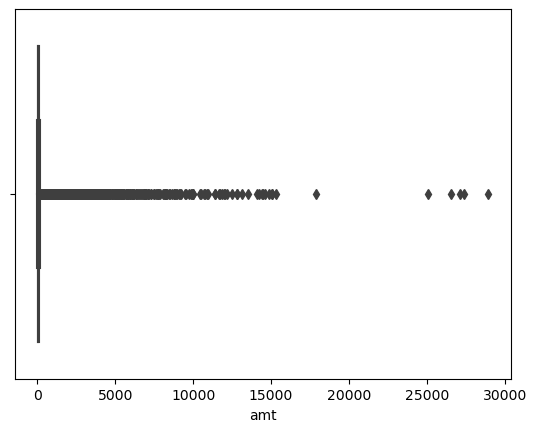

In [12]:
import seaborn as sns

sns.boxplot(x['amt'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_pop'>

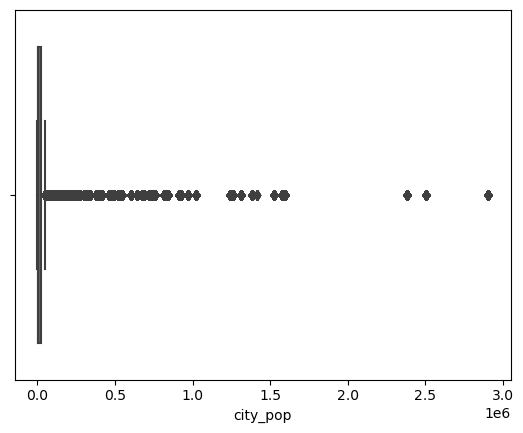

In [13]:
sns.boxplot(x['city_pop'])

In [14]:
x['amt'].skew()

42.277873790051174

In [15]:
from scipy.stats import boxcox

x['amt'] = boxcox(x['amt'])[0]
x['amt'].skew()

-0.01554494300041963

In [16]:
x['city_pop'].skew()

5.593853066842104

In [17]:
x['city_pop'] = boxcox(x['city_pop'])[0]
x['city_pop'].skew()

0.05750405771141423

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amt'>

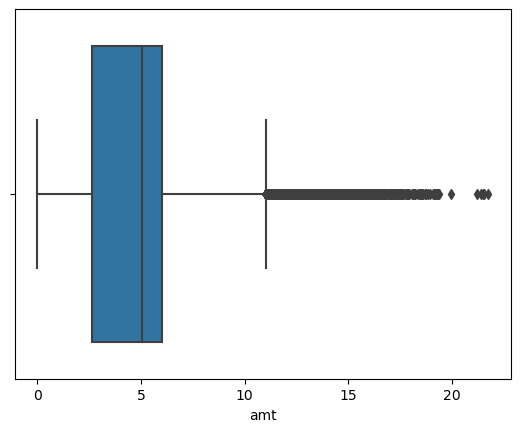

In [18]:
sns.boxplot(x['amt'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city_pop'>

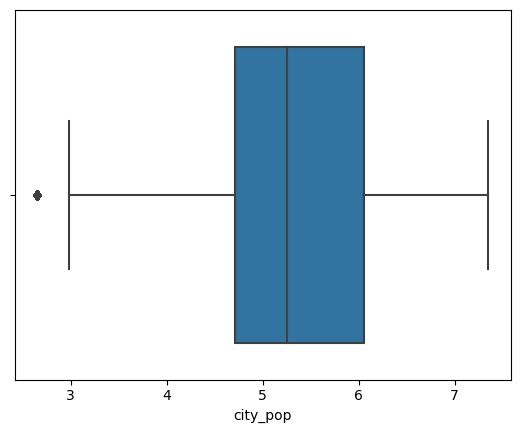

In [19]:
sns.boxplot(x['city_pop'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amt'>

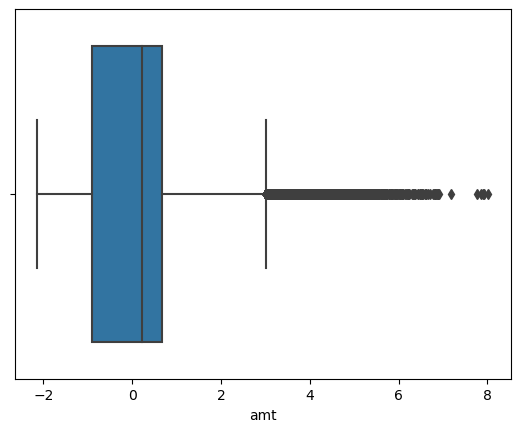

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x['amt'] = scaler.fit_transform(x[['amt']])
sns.boxplot(x['amt'])

<AxesSubplot:>

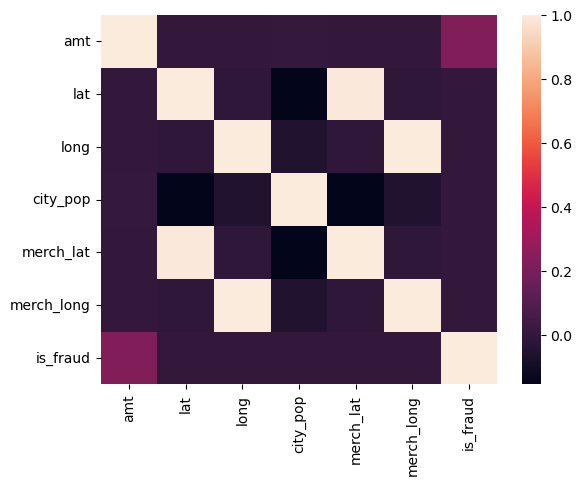

In [21]:
sns.heatmap(df.corr())

In [22]:
y.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [23]:
y_zero = x[(y==0)]
del_rows = y_zero[(x['amt']>=1)|(x['amt']<=-1)]
x.drop(del_rows.index, axis=0, inplace=True)
y.drop(del_rows.index, axis=0, inplace=True)
y.value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_2476\2767608322.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del_rows = y_zero[(x['amt']>=1)|(x['amt']<=-1)]


0    857798
1      7506
Name: is_fraud, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amt'>

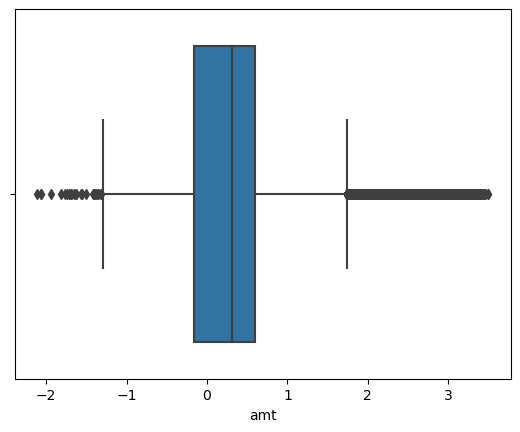

In [24]:
sns.boxplot(x['amt'])

In [25]:
def get_prediction(data):
    data['merchant'] = le_merchant.transform(data['merchant'])
    data['job'] = le_job.transform(data['job'])
    data['amt'] = scaler.tansform(data['amt'])